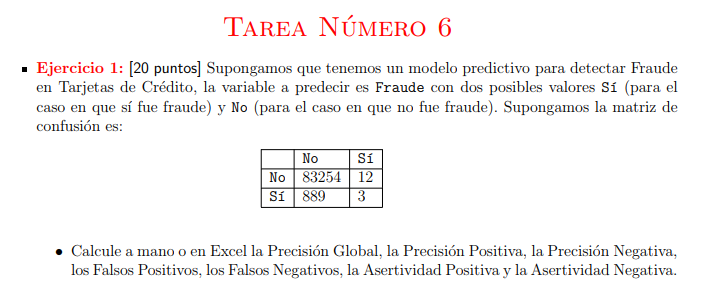

## Precisión global

### (VN + VP) / (VN + FP + FN + VP) 

### (83254 + 3) / (83254 + 12 +889 + 3)

### 0.9892

## Precisión positiva

### VP / FN + VP

### 3 / 889 + 3

### 0.003

## Precisión negativa

### (VN) / (VN + FP) 

### 83254 / (83254 + 12)

### 0.9998

## Precisión falsos positivos

### (FP) / (VN + FP) 

### 12 / (83254 + 12)

### 1.44

## Precisión falsos negativos

### FN  /  (FN + VP)

### 889 / 889 + 3

### 0.985

## Asertividad Positiva

### VP / (FP + VP) 

### 3 / (12 + 3)

### 0.2

## Asertividad Negativa

### VN / (FN + VN) 

### 83254 / (889 + 83254)

### 0.989

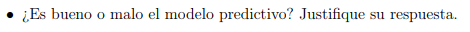

### A pesar de que tiene una precisión alta, lo escencial de un modelo predicitvo para fraude es que tenga una asertividad alta en los casos que son fraude para poder detenerlo, y el de este modelo es bastante bajo, ademas hay un importante numero de casos que no corresponden a fraude que son detectados erroneamente como fraude, esto es muy peligroso ya que se pueden cortar transacciones muy importantes para clientes que no han cometido fraude.

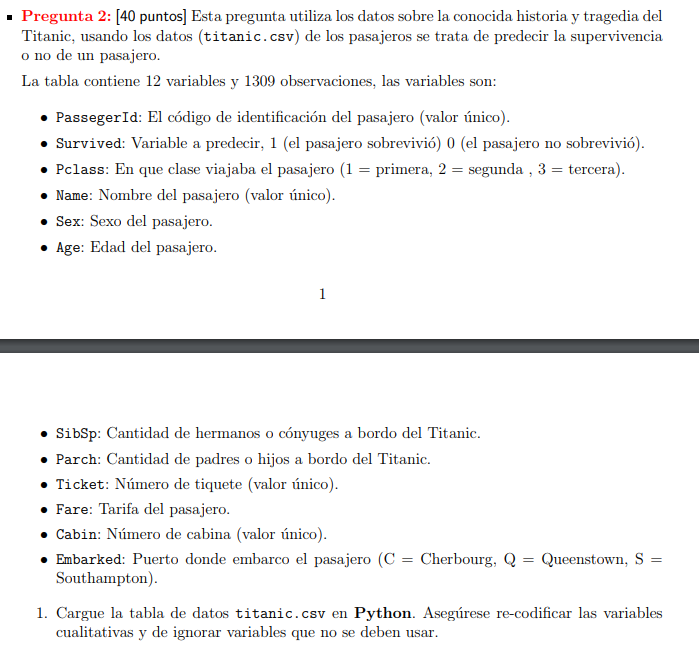

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import math

os.chdir("/Users/Andrey/Desktop/Data-Science-Course/VII Lecture")

pd.set_option('display.max_rows', 1000)

datos = pd.read_csv('titanic.csv',delimiter=',',decimal=".",index_col=0)

def recodificar(col, nuevo_codigo):
  col_cod = pd.Series(col, copy=True)
  for llave, valor in nuevo_codigo.items():
    col_cod.replace(llave, valor, inplace=True)
  return col_cod

datos["Survived"] = recodificar(datos["Survived"], {0 : 'No', 1: 'Yes'})
datos["Pclass"] = recodificar(datos["Pclass"], {1 : 'First', 2: 'Second', 3: 'Third'})

datos['Sex'] = datos['Sex'].astype('category')
datos['Embarked'] = datos['Embarked'].astype('category')
datos['Pclass'] = datos['Pclass'].astype('category')

datos["Sex"] = datos["Sex"].cat.codes
datos["Embarked"] = datos["Embarked"].cat.codes
datos["Pclass"] = datos["Pclass"].cat.codes

datos['Sex'] = datos['Sex'].astype('category')
datos['Embarked'] = datos['Embarked'].astype('category')
datos['Pclass'] = datos['Pclass'].astype('category')

del[datos["Name"]]
del[datos["Ticket"]]
del[datos["Cabin"]]

datos = datos.fillna(np.mean(datos))

print(datos.head())


            Survived Pclass Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                          
1                 No      2   1  22.0      1      0   7.2500        2
2                Yes      0   0  38.0      1      0  71.2833        0
3                Yes      2   0  26.0      0      0   7.9250        2
4                Yes      0   0  35.0      1      0  53.1000        2
5                 No      2   1  35.0      0      0   8.0500        2


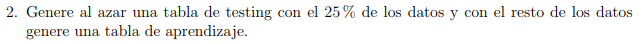

In [2]:
# Se dejan las variables predictorias en una tabla

X = datos.iloc[:,1:] 
print(X.head())

            Pclass Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                 
1                2   1  22.0      1      0   7.2500        2
2                0   0  38.0      1      0  71.2833        0
3                2   0  26.0      0      0   7.9250        2
4                0   0  35.0      1      0  53.1000        2
5                2   1  35.0      0      0   8.0500        2


In [3]:
# Se separa las variablea a predecir

y = datos.iloc[:,0:1] 
print(y.head())

            Survived
PassengerId         
1                 No
2                Yes
3                Yes
4                Yes
5                 No


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

print("========Tabla de entrenamiento========")

print(X_train.head())

print("========Tabla de test========")

print(X_test.head())

print("========Tabla de entrenamiento a predecir========")

print(y_train.head())


print("========Tabla de test a predecir========")

print(y_test.head())

========Tabla de entrenamiento========
            Pclass Sex        Age  SibSp  Parch     Fare Embarked
PassengerId                                                      
748              1   0  30.000000      0      0  13.0000        2
566              2   1  24.000000      2      0  24.1500        2
83               2   0  29.881138      0      0   7.7875        1
568              2   0  29.000000      0      4  21.0750        2
864              2   0  29.881138      8      2  69.5500        2
========Tabla de test========
            Pclass Sex        Age  SibSp  Parch      Fare Embarked
PassengerId                                                       
1140             1   0  29.000000      1      0   26.0000        2
534              2   0  29.881138      0      2   22.3583        0
460              2   1  29.881138      0      0    7.7500        1
1151             2   1  21.000000      0      0    7.7750        2
394              0   0  23.000000      1      0  113.2750        0


C:\Users\Andrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


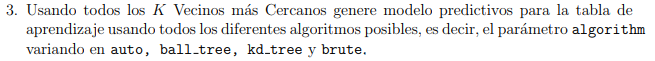

In [5]:
#3 Aplicando KNN

# Primero sacar k

cantidad = X_train.shape[0]

k = math.sqrt(cantidad)

k = math.trunc(k)

print("---------------AUTO-----------------")

instancia_knn_auto = KNeighborsClassifier(n_neighbors=k,algorithm='auto')

instancia_knn_auto.fit(X_train,y_train)

print("Las predicciones en Testing son: {}".format(instancia_knn_auto.predict(X_test)))

print("Precisión en Testing: {:.2f}".format(instancia_knn_auto.score(X_test, y_test)))

print("---------------BALL TREE-----------------")

instancia_knn_ball_tree = KNeighborsClassifier(n_neighbors=k,algorithm='ball_tree')

instancia_knn_ball_tree.fit(X_train,y_train)

print("Las predicciones en Testing son: {}".format(instancia_knn_ball_tree.predict(X_test)))

print("Precisión en Testing: {:.2f}".format(instancia_knn_ball_tree.score(X_test, y_test)))


print("---------------KD TREE-----------------")

instancia_knn_kd_tree = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')

instancia_knn_kd_tree.fit(X_train,y_train)

print("Las predicciones en Testing son: {}".format(instancia_knn_kd_tree.predict(X_test)))

print("Precisión en Testing: {:.2f}".format(instancia_knn_kd_tree.score(X_test, y_test)))

print("---------------BRUTE-----------------")

instancia_knn_brute = KNeighborsClassifier(n_neighbors=k,algorithm='brute')

instancia_knn_brute.fit(X_train,y_train)

print("Las predicciones en Testing son: {}".format(instancia_knn_brute.predict(X_test)))

print("Precisión en Testing: {:.2f}".format(instancia_knn_brute.score(X_test, y_test)))

---------------AUTO-----------------
Las predicciones en Testing son: ['No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' '

C:\Users\Andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\Andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


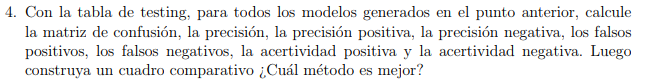

In [6]:
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por Categoría":precision_categoria}
    
def precisiones(MC):
    VN = MC[0][0]
    FP = MC[0][1]
    FN = MC[1][0]
    VP = MC[1][1]
    
    return {"Precision Global": (VN + VP) / (VN + FP + FN + VP), 
            "Precisión Positiva": VP / (FN + VP), 
            "Precisión Negativa": VN / (VN + FP), 
            "Precisión Falsos Positivos": FP / (VN + FP),
            "Precisión Falsos Negativos": FN / (VP + FN),
            "Asertividad Positiva": VP / (FP + VP),
            "Asertividad Negativa": VN / (FN + VN)}

In [7]:
def resumenMatrizPrecisiones(instancia):
    prediccion = instancia_knn_auto.predict(X_test)
    MC = confusion_matrix(y_test, prediccion)
    indices = indices_general(MC,list(np.unique(y)))
    
    for k in indices:
        print("\n%s:\n%s"%(k,str(indices[k])))
    
    #Extrayendo precisiones

    p = precisiones(MC)

    for k in p:
        print("\n%s:\n%s"%(k,str(p[k])))

In [10]:
print("Matriz de confusion y precisiones para modelo auto")

resumenMatrizPrecisiones(instancia_knn_auto)


print("Matriz de confusion y precisiones para modelo BALL TREE")

resumenMatrizPrecisiones(instancia_knn_ball_tree)


print("Matriz de confusion y precisiones para modelo KD TREE")

resumenMatrizPrecisiones(instancia_knn_kd_tree)

print("Matriz de confusion y precisiones para modelo BRUTE")

resumenMatrizPrecisiones(instancia_knn_brute)

Matriz de confusion y precisiones para modelo auto

Matriz de Confusión:
[[176  21]
 [ 27 103]]

Precisión Global:
0.8532110091743119

Error Global:
0.14678899082568808

Precisión por Categoría:
          0         1
0  0.893401  0.792308

Precision Global:
0.8532110091743119

Precisión Positiva:
0.7923076923076923

Precisión Negativa:
0.8934010152284264

Precisión Falsos Positivos:
0.1065989847715736

Precisión Falsos Negativos:
0.2076923076923077

Asertividad Positiva:
0.8306451612903226

Asertividad Negativa:
0.8669950738916257
Matriz de confusion y precisiones para modelo BALL TREE

Matriz de Confusión:
[[176  21]
 [ 27 103]]

Precisión Global:
0.8532110091743119

Error Global:
0.14678899082568808

Precisión por Categoría:
          0         1
0  0.893401  0.792308

Precision Global:
0.8532110091743119

Precisión Positiva:
0.7923076923076923

Precisión Negativa:
0.8934010152284264

Precisión Falsos Positivos:
0.1065989847715736

Precisión Falsos Negativos:
0.2076923076923077

Aser

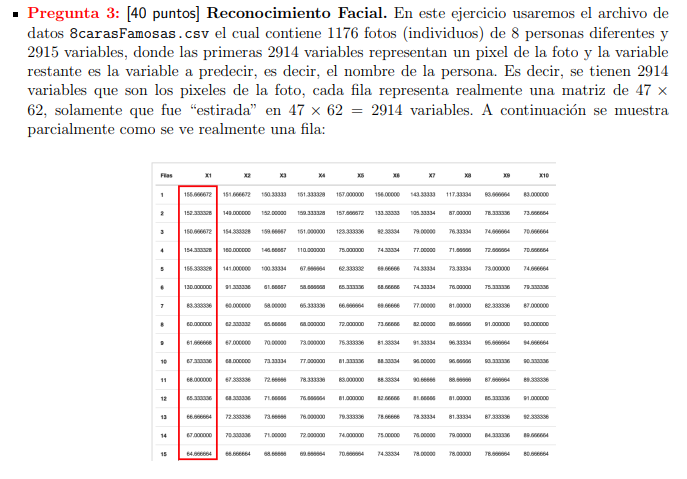

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import math
import random
from   sklearn.datasets import make_blobs
# Import the dendrogram function and the ward, single, complete, average, linkage and fcluster clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward, single, complete,average,linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.utils.multiclass import unique_labels
    
os.chdir("/Users/Andrey/Desktop/Data-Science-Course/VII Lecture")

pd.set_option('display.max_rows', 1000)

datos_caras = pd.read_csv('8carasFamosas.csv',delimiter=';',decimal=".",index_col=0)

print(datos_caras.head())

                  pix2        pix3        pix4        pix5        pix6  \
pix1                                                                     
155.666672  152.333328  150.666672  154.333328  155.333328  130.000000   
160.333328  128.666672   93.000000   65.000000   48.333332   44.000000   
24.333334    20.333334   17.333334   16.000000   33.333332   55.333332   
57.000000   147.000000  197.000000  209.666672  228.333328  237.666672   
12.666667    62.666668  158.333328  189.000000  183.666672  183.333328   

                  pix7        pix8        pix9       pix10       pix11  ...  \
pix1                                                                    ...   
155.666672   83.333336   60.000000   61.666668   67.333336   68.000000  ...   
160.333328   34.333332   40.666668   99.000000  131.666672  127.000000  ...   
24.333334    59.000000   54.666668   39.000000   27.000000   27.000000  ...   
57.000000   233.333328  224.666672  181.333328  143.333328  140.333328  ...   
12.6666

In [11]:
def centroide(num_cluster, datos, clusters):
  ind = clusters == num_cluster
  return(pd.DataFrame(datos[ind].mean()).T)

def plot_image(valor_cara, titulo = None, filas = 62, cols = 42):
    image = np.array(list(reversed(valor_cara)))
    image = pd.to_numeric(image, errors = 'coerce')
    image = image.reshape(62, 47)
    plt.imshow(image, cmap = "pink")
    ejes = plt.gca()
    ejes.axes.get_xaxis().set_visible(False)
    ejes.axes.get_yaxis().set_visible(False)
    if titulo is not None:
        plt.title(titulo)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

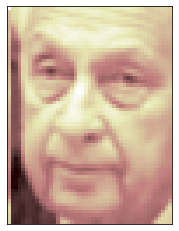

In [12]:
plot_image(datos_caras.iloc[0, range(2914)], datos_caras.iloc[0, range(2914)])

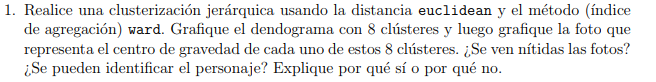

                 Nombres
pix1                    
155.666672  Ariel Sharon
160.333328  Ariel Sharon
24.333334   Ariel Sharon
57.000000   Ariel Sharon
12.666667   Ariel Sharon
                  pix2        pix3        pix4        pix5        pix6  \
pix1                                                                     
155.666672  152.333328  150.666672  154.333328  155.333328  130.000000   
160.333328  128.666672   93.000000   65.000000   48.333332   44.000000   
24.333334    20.333334   17.333334   16.000000   33.333332   55.333332   
57.000000   147.000000  197.000000  209.666672  228.333328  237.666672   
12.666667    62.666668  158.333328  189.000000  183.666672  183.333328   

                  pix7        pix8        pix9       pix10       pix11  ...  \
pix1                                                                    ...   
155.666672   83.333336   60.000000   61.666668   67.333336   68.000000  ...   
160.333328   34.333332   40.666668   99.000000  131.666672  127.00000

NameError: name 'open_close_plot' is not defined

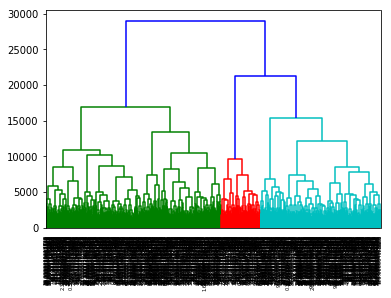

In [14]:
#C.1
    
#Debemos remover la columna de Nombres

y = datos_caras.iloc[:,2913:2914]

print(y.head())

X = datos_caras.iloc[:, :-1]

print(X.head())

ward_res = ward(X)

dendrogram(ward_res,labels= datos_caras.index.tolist())

open_close_plot()

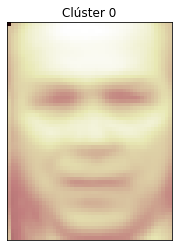

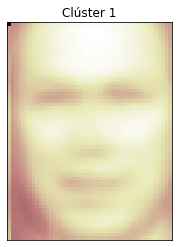

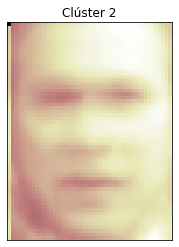

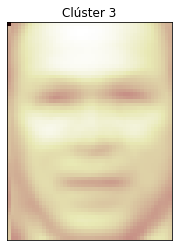

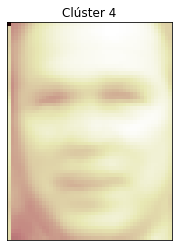

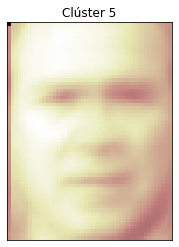

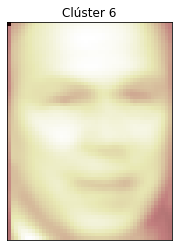

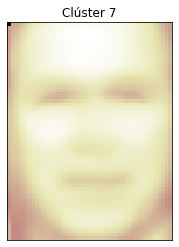

In [17]:
grupos = fcluster(linkage(pdist(X), method = 'ward', metric='euclidean'), 8, criterion = 'maxclust')
grupos = grupos-1 # Se resta 1 para que los clústeres se enumeren de 0 a (K-1), como usualmente lo hace Python


centros = np.array(pd.concat([centroide(0, X, grupos),
                              centroide(1, X, grupos),
                              centroide(2, X, grupos),
                              centroide(3, X, grupos),
                              centroide(4, X, grupos),
                              centroide(5, X, grupos),
                              centroide(6, X, grupos),
                              centroide(7, X, grupos)]))

for i in range(8):
    plot_image(np.append(centros[i], 7), f'Clúster {i}')
    plt.show()

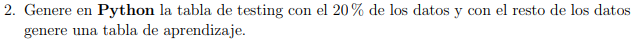

In [18]:
os.chdir("/Users/Andrey/Desktop/Data-Science-Course/VII Lecture")

pd.set_option('display.max_rows', 1000)

datos_caras = pd.read_csv('8carasFamosas.csv',delimiter=';',decimal=".",index_col=0)

predecir_col = datos_caras.iloc[:,2913:2914]

print(predecir_col.head())

X = datos_caras.iloc[:,:2913]

X_train, X_test, y_train, y_test = train_test_split(X, predecir_col, train_size=0.8, random_state=0)

                 Nombres
pix1                    
155.666672  Ariel Sharon
160.333328  Ariel Sharon
24.333334   Ariel Sharon
57.000000   Ariel Sharon
12.666667   Ariel Sharon


C:\Users\Andrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


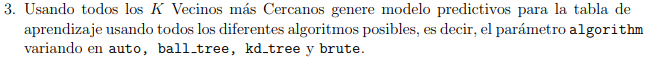

In [19]:
cantidad = X_train.shape[0]

k = math.sqrt(cantidad)

k = math.trunc(k)

print(k)

print("---------------AUTO-----------------")

instancia_knn_auto = KNeighborsClassifier(n_neighbors=k,algorithm='auto')

instancia_knn_auto.fit(X_train,y_train)

print("Precisión en Testing: {:.2f}".format(instancia_knn_auto.score(X_test, y_test)))

print("---------------BALL TREE-----------------")

instancia_knn_ball_tree = KNeighborsClassifier(n_neighbors=k,algorithm='ball_tree')

instancia_knn_ball_tree.fit(X_train,y_train)


print("Precisión en Testing: {:.2f}".format(instancia_knn_ball_tree.score(X_test, y_test)))


print("---------------KD TREE-----------------")

instancia_knn_kd_tree = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')

instancia_knn_kd_tree.fit(X_train,y_train)


print("Precisión en Testing: {:.2f}".format(instancia_knn_kd_tree.score(X_test, y_test)))

print("---------------BRUTE-----------------")

instancia_knn_brute = KNeighborsClassifier(n_neighbors=k,algorithm='brute')

instancia_knn_brute.fit(X_train,y_train)

print("Precisión en Testing: {:.2f}".format(instancia_knn_brute.score(X_test, y_test)))

30
---------------AUTO-----------------


C:\Users\Andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


Precisión en Testing: 0.47
---------------BALL TREE-----------------


C:\Users\Andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Precisión en Testing: 0.47
---------------KD TREE-----------------


C:\Users\Andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Precisión en Testing: 0.47
---------------BRUTE-----------------
Precisión en Testing: 0.47


C:\Users\Andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


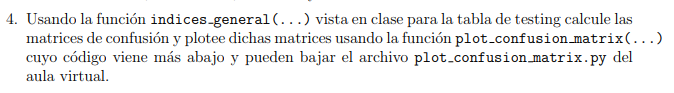

Matriz de Confusión:
[[ 0  8  0  8  0  0  0  0]
 [ 0 21  0 10  0  0  0  0]
 [ 0  4  3  8  0  0  0  0]
 [ 0  9  0 84  0  0  0  0]
 [ 0  5  1 14  0  0  0  0]
 [ 0  6  0 10  0  0  0  0]
 [ 0  4  0 11  0  0  0  0]
 [ 0  7  0 20  0  0  0  3]]


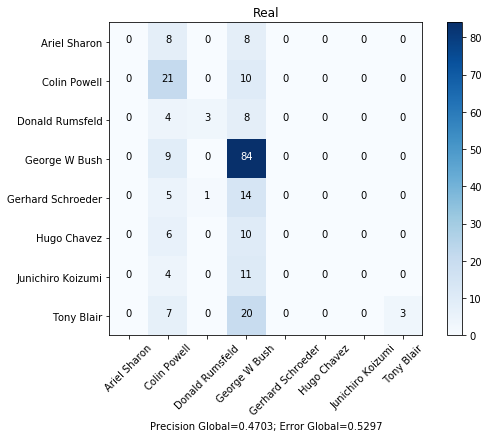

In [22]:
prediccion = instancia_knn_brute.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
print("Matriz de Confusión:\n{}".format(MC))

def plot_confusion_matrix(cm, target_names, title = 'Matriz de Confusion',cmap = None, normalize = True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize = (8, 6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 45)
        plt.yticks(tick_marks, target_names)
            
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]), horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.xlabel('Precision Global={:0.4f}; Error Global={:0.4f}'.format(accuracy, misclass))
    
plot_confusion_matrix(MC, unique_labels(datos_caras['Nombres']), title = "Real",
normalize = False)

Matriz de Confusión:
[[ 0  8  0  8  0  0  0  0]
 [ 0 21  0 10  0  0  0  0]
 [ 0  4  3  8  0  0  0  0]
 [ 0  9  0 84  0  0  0  0]
 [ 0  5  1 14  0  0  0  0]
 [ 0  6  0 10  0  0  0  0]
 [ 0  4  0 11  0  0  0  0]
 [ 0  7  0 20  0  0  0  3]]


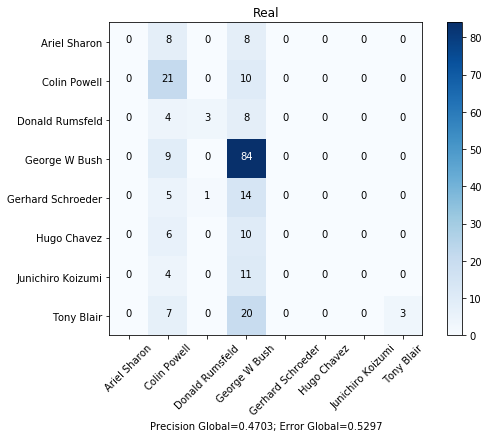

In [23]:
prediccion = instancia_knn_auto.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
print("Matriz de Confusión:\n{}".format(MC))

plot_confusion_matrix(MC, unique_labels(datos_caras['Nombres']), title = "Real",
normalize = False)
